<a href="https://colab.research.google.com/github/pafernannapi18/GithubIntro/blob/main/14thAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
#Problem 1
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib_inline 
iris= load_iris()

X = pd.DataFrame(iris.data, columns= iris.feature_names)
X.head()
y  = pd.DataFrame(iris.target, columns= (['species']))
y.head()
df = pd.concat([X, y], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
h1 = df1.loc[df1['species']!= 0]
h1


,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


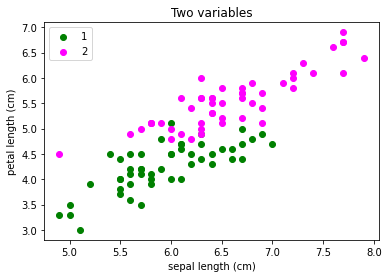

In [247]:
## Problem 2-a
colors = ['green', 'magenta']
species = [1, 2]
for i in range(2):
  x = h1[h1['species'] == species[i]]
  plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c = colors[i], label = species[i])
  plt.xlabel("sepal length (cm)")
  plt.ylabel("petal length (cm)")
  plt.title('Two variables')
  plt.legend()

{'boxes': [<matplotlib.lines.Line2D at 0x7fd21e96da50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd21e8f0a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd21e8f9ad0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd21e8f9590>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd21e96dfd0>,
  <matplotlib.lines.Line2D at 0x7fd21e90ddd0>]}

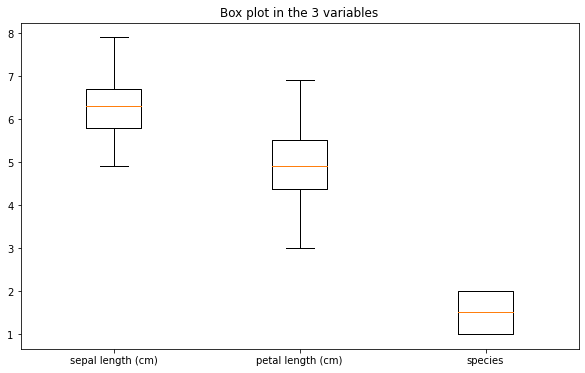

In [248]:
#Problem 2-b
#import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Box plot in the 3 variables')
plt.boxplot(h1.values, labels=['sepal length (cm)', 'petal length (cm)', 'species'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fd21ea63dd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fd21e883490>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fd21e875e10>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7fd21e883c90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fd21e8837d0>}

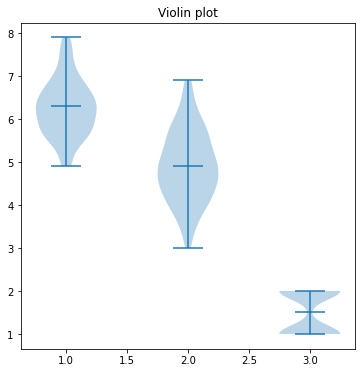

In [249]:
## Problem 2-c
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('Violin plot')
plt.violinplot(h1.values, showmedians= True)

In [250]:
## Probelm 3
from sklearn.model_selection import train_test_split
# train 75%
# test 25%
X = h1.drop(columns=['species'])
Y = h1['species']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state= 42)

In [251]:
## Problem 4
from sklearn.preprocessing import StandardScaler

iris = h1
scaler = StandardScaler()

print(scaler.fit(iris))
StandardScaler()
print(scaler.mean_)
#print(scaler.transform(iris))

StandardScaler(copy=True, with_mean=True, with_std=True)
[6.262 4.906 1.5  ]


In [252]:
## Problem 5
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [253]:
model.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [254]:
print(model.predict(X))
preds = model.predict(X)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2]


In [255]:
print(model.predict_proba(X))

[[0.66666667 0.33333333]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]


In [256]:
## Problem 6
# Print metric to get performance 
print("accuracy:", round(model.score(x_train, y_train)*100))

accuracy: 96


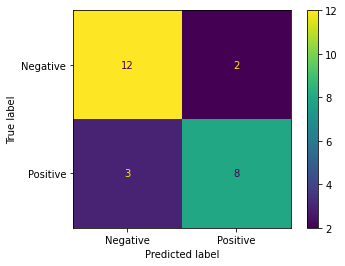

In [257]:
# Print metric to get performance
from sklearn.metrics import precision_score
from sklearn import metrics
preds = model.predict(x_test)
metrics.plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'])

In [258]:
## Confusion Matrix
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([12,  2,  3,  8])

In [259]:
## Accuracy Measure
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.8

In [260]:
## Precision Measure
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
precision_negative = metrics.precision_score(y_test, preds, pos_label=2)
precision_positive, precision_negative


(0.8, 0.8)

In [261]:
## Recall 
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
recall_spesificity = metrics.recall_score(y_test, preds, pos_label=2)
recall_sensitivity, recall_spesificity

(0.8571428571428571, 0.7272727272727273)

In [262]:
## F1-score Measure
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
f1_negative = metrics.f1_score(y_test, preds, pos_label=2)
f1_negative, f1_positive


(0.761904761904762, 0.8275862068965518)

In [263]:
## Problem 7
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.patches as mpatches
import seaborn as sns



(4.800000000000001, 8.0, 2.9, 7.0)

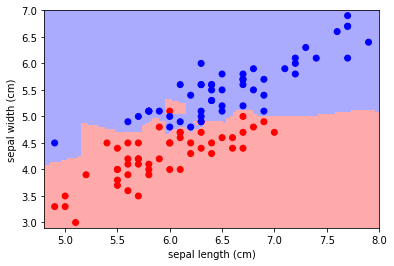

In [265]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
iris= load_iris()

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

P = pd.DataFrame(iris.data, columns= iris.feature_names)
P.head()
V  = pd.DataFrame(iris.target, columns= (['species']))
V.head()
df = pd.concat([P, V], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
h1 = df1.loc[df1['species']!= 0]
t = h1.iloc[:, 0]
r = h1.iloc[:, 1]
X =pd.concat([t, r], axis=1)
y = h1.iloc[:, 2]

#iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features. We could
                       # avoid this ugly slicing by using a two-dim dataset
#y = iris.target


knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')


In [266]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [267]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [268]:
# Model training
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [269]:
# Print metric to get performance 
print("accuracy:", round(model.score(x_train, y_train)*100))

accuracy: 97


In [270]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [271]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [272]:
# Print metric to get performance 
print("accuracy:", round(model.score(x_train, y_train)*100))

accuracy: 100
